## Task: To calculate Inertia for the given dataset from scratch

In [1]:
## Importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("clustering.csv")
data.head()

,label,x,y
0,2,94,81
1,1,1,12
2,2,62,80
3,2,92,64
4,2,83,64


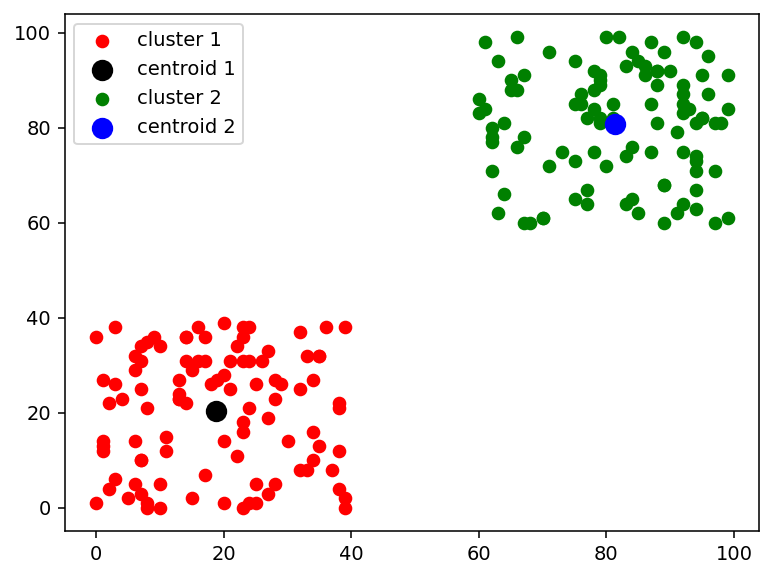

In [3]:
#plotting clusters
plt.figure(dpi=140)

#cluster1 and its centroid
cluster1 = data[data['label'] == 1]
plt.scatter(cluster1['x'],cluster1['y'], color='red', label ='cluster 1')
plt.scatter(cluster1['x'].mean(), cluster1['y'].mean(), s=100, color='black', label='centroid 1')

#cluster2 and its centroid
cluster2 = data[data['label']==2]
plt.scatter(cluster2['x'],cluster2['y'], color='green', label ='cluster 2')
plt.scatter(cluster2['x'].mean(),cluster2['y'].mean() ,s=100, label = 'centroid 2', color = 'blue')

plt.legend()
plt.show()

Calculating Inertia of clusters

**Steps to Calculate Inertia:**
 
 1.   define a function to calculate eucledian distance

 2.   calculate distance of every point in cluster 1 from it's centroid

 3.   calculate distance of every point in cluster 2 from it's centroid
 
 4.   calculate Inertia

In [4]:
# Importing necessary libraries
import numpy as np

# Step 1: Defining a function for "euclid" to calculate the Euclidean distance between two points
def euclid(pt1, pt2):
    '''
    pt1, pt2: two points/coordinates to calculate distance between, must be of same dimension
    returns the distance between the two points
    '''
    return np.sqrt(np.sum((np.array(pt1) - np.array(pt2))**2))

# Testing function
print(euclid([5,5],[10,10]))
print(euclid([1,3],[10,12]))

# Expected outcome:
# 7.0710678118654755
# 12.727922061357855


7.0710678118654755
12.727922061357855


#### Expected outcome: 

<img src="images/image2.png" >

In [5]:
def Inertia(data):
    '''
    given the complete data points with with cluster target(labels), calculate Inertia
    Hint: 
    1. Identify number of clusters
    2. For each cluster
        a. calculate centroid
        b. use the function : "euclid"
        c. calculate total sum within that cluster
    3. Return inertia
    '''
    # Step 1: Identify number of clusters
    num_clusters = len(data['label'].unique())
    
    total_inertia = 0
    
    # Step 2: For each cluster
    for cluster_label in range(1, num_clusters + 1):
        # Filter data points belonging to current cluster
        cluster_data = data[data['label'] == cluster_label]
        
        # Calculate centroid of the cluster
        centroid = [cluster_data['x'].mean(), cluster_data['y'].mean()]  # Assuming 'x' and 'y' are column names
        
        # Step 2b: Use the function "euclid" to calculate distance of every point in cluster from its centroid
        total_distance_within_cluster = 0
        for _, point in cluster_data.iterrows():
            total_distance_within_cluster += euclid([point['x'], point['y']], centroid)**2  # Squaring the distance for inertia
        
        # Step 2c: Calculate total sum within that cluster
        total_inertia += total_distance_within_cluster
        
    # Step 3: Return inertia
    return total_inertia

# Testing the function
data = pd.read_csv("clustering.csv")  # Assuming you have the data loaded
inertia = Inertia(data)
print(inertia)


55150.39000000001


In [6]:
Inertia(data)

55150.39000000001

**Expected Outcome**

<img src="images/image3.png">